<a href="https://colab.research.google.com/github/HenryZumaeta/py4cd_EPC2025/blob/main/C05/C05_Script01_Merge_Agrupacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Esquema Estrella](https://i.imgur.com/HRhd2Y0.png)


In [1]:
# Módulos y datos
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datos (Carguemos en memoria las 8 tablas del esquema estrella (snowflake))
olist_orders = pd.read_csv("https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/refs/heads/master/olist_brazil/olist_orders_dataset.csv")
olist_order_items = pd.read_csv("https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/refs/heads/master/olist_brazil/olist_order_items_dataset.csv")
olist_order_payments = pd.read_csv("https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/refs/heads/master/olist_brazil/olist_order_payments_dataset.csv")
olist_order_reviews = pd.read_csv("https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/refs/heads/master/olist_brazil/olist_order_reviews_dataset.csv")
olist_products = pd.read_csv("https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/refs/heads/master/olist_brazil/olist_products_dataset.csv")
olist_sellers = pd.read_csv("https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/refs/heads/master/olist_brazil/olist_sellers_dataset.csv")
olist_order_customer = pd.read_csv("https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/refs/heads/master/olist_brazil/olist_customers_dataset.csv")
olist_geolocation = pd.read_csv("https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/refs/heads/master/olist_brazil/olist_geolocation_dataset.csv")

{
    "olist_orders": olist_orders.columns,
    "olist_order_items": olist_order_items.columns,
    "olist_order_payments": olist_order_payments.columns,
    "olist_order_reviews": olist_order_reviews.columns,
    "olist_products": olist_products.columns,
    "olist_sellers": olist_sellers.columns,
    "olist_order_customer": olist_order_customer.columns,
    "olist_geolocation": olist_geolocation.columns
}

{'olist_orders': Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
        'order_approved_at', 'order_delivered_carrier_date',
        'order_delivered_customer_date', 'order_estimated_delivery_date'],
       dtype='object'),
 'olist_order_items': Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
        'shipping_limit_date', 'price', 'freight_value'],
       dtype='object'),
 'olist_order_payments': Index(['order_id', 'payment_sequential', 'payment_type',
        'payment_installments', 'payment_value'],
       dtype='object'),
 'olist_order_reviews': Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
        'review_comment_message', 'review_creation_date',
        'review_answer_timestamp'],
       dtype='object'),
 'olist_products': Index(['product_id', 'product_category_name', 'product_name_lenght',
        'product_description_lenght', 'product_photos_qty', 'product_weight_g',
        'product_length_cm', 'product_he

In [ ]:
# olist_orders: Del esquema de la base de datos, concluimos que esta tabla es la tabla de hechos (TABLA CENTRAL)
# 'order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
        #'order_approved_at', 'order_delivered_carrier_date',
        #'order_delivered_customer_date', 'order_estimated_delivery_date'

# El rol principal de esta tabla es la de registrar cada pedido realizado

# Relaciones
  # -> olist_order_customer: Por customer_id → 1:N (Un cliente puede tener muchos pedidos)
  # -> olist_order_items: Por order_id → 1:N (Un pedido puede tener múltiples items)
  # -> olist_order_payments: Por order_id → 1:N (Un pedido puede tener múltiples formas de paso, auque normalente 1)
  # -> olist_order_reviews: Por order_id → 1:1 o 1:0 (No todos los pedidos tienen reseña)
  # -> Indiderectamente (Por intermedio de olist_order_items) → Se conecta con olist_products y olist_sellers

In [ ]:
# olist_order_customer: Dimensión del cliente
# ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
        # 'customer_city', 'customer_state'

# Rol: Almacenar información del cliente

# Relaciones

In [ ]:
# Después de entender las relaciones que puede tener cada tabla con cualqueira de las otras
# Se puede construir resultados específicos.+

# Tiempo promedio de entrega por estado del país
# olist_orders + olist_order_customer + olist_geolocation

# Productos más vendidos por categoría
# olist_order_items + olist_products

# Vendedores con mejor score de reseñas
# olist_order_items + olist_sellers + olist_order_reviews

# ...

# Análisis de `olist_orders`: Nodo central de la base de datos

In [3]:
olist_orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [4]:
olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [6]:
# Veamos qué información nos puede proveer la columna: order_purchase_timestamp
olist_orders.order_purchase_timestamp

,order_purchase_timestamp
0,2017-10-02 10:56:33
1,2018-07-24 20:41:37
2,2018-08-08 08:38:49
3,2017-11-18 19:28:06
4,2018-02-13 21:18:39
...,...
99436,2017-03-09 09:54:05
99437,2018-02-06 12:58:58
99438,2017-08-27 14:46:43
99439,2018-01-08 21:28:27


In [8]:
# Transformar la columna order_purchase_timestamp a un dato que refleje información temporal.
# En vista de la información que almacena la columna: datatime
olist_orders.order_purchase_timestamp = pd.to_datetime(olist_orders.order_purchase_timestamp, format="%Y-%m-%d %H:%M:%S")

print("""
Rango de fechas:
  Fecha mínima: %s
  Fecha máxima: %s
""" % (olist_orders.order_purchase_timestamp.min(), olist_orders.order_purchase_timestamp.max()))


Rango de fechas:
  Fecha mínima: 2016-09-04 21:15:19
  Fecha máxima: 2018-10-17 17:30:18



In [9]:
# Extraemos componentes temporales: Creamos columnas derivadas

olist_orders["Year"] = olist_orders.order_purchase_timestamp.dt.year
olist_orders["Mont"] = olist_orders.order_purchase_timestamp.dt.month
olist_orders["MontName"] = olist_orders.order_purchase_timestamp.dt.month_name()
olist_orders["DayOfWeek"] = olist_orders.order_purchase_timestamp.dt.dayofweek
olist_orders["DayName"] = olist_orders.order_purchase_timestamp.dt.day_name()
olist_orders["Hour"] = olist_orders.order_purchase_timestamp.dt.hour
olist_orders["Date"] = olist_orders.order_purchase_timestamp.dt.date

In [10]:
olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
 8   Year                           99441 non-null  int32         
 9   Mont                           99441 non-null  int32         
 10  MontName                       99441 non-null  object        
 11  DayOfWeek      

In [11]:
# ¿De qué años tengo información?=
olist_orders.Year.unique()

array([2017, 2018, 2016], dtype=int32)

Year
2018    54011
2017    45101
2016      329
Name: count, dtype: int64


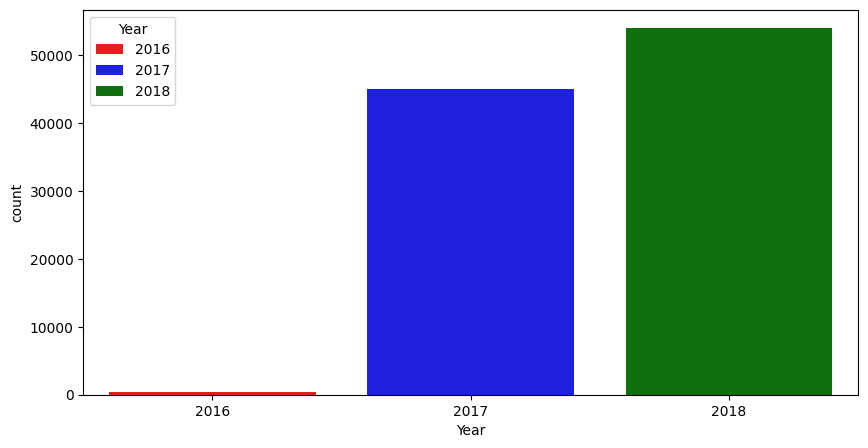

In [17]:
# Análisis del número de orders por año
print(olist_orders.Year.value_counts())

plt.figure(figsize=(10, 5))
sns.countplot(x="Year",
              data=olist_orders,
              palette={2016: "red", 2017: "blue", 2018: "green"},
              hue= "Year")
plt.show()

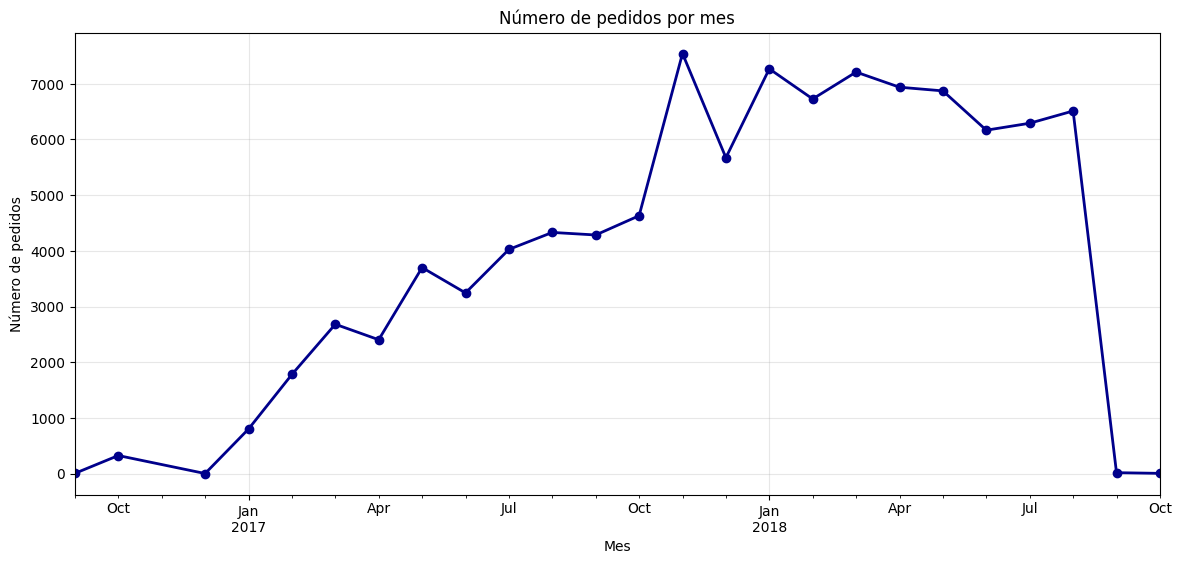

In [22]:
# Análisis  por mes (Tendencia estacional)
# Agrupar por año y mes
olist_orders["YearMonth"] = olist_orders.order_purchase_timestamp.dt.to_period("M")

# Número de órdenes/pedidos de cada año-mes donde tengo datos
monthly_orders = olist_orders.groupby("YearMonth").size()

# Visualización
plt.figure(figsize=(14, 6))
monthly_orders.plot(marker = "o", linewidth = 2, color = "darkblue")
plt.title("Número de pedidos por mes")
plt.xlabel("Mes")
plt.ylabel("Número de pedidos")
plt.grid(True, alpha = 0.3)

# Fin
plt.tight_layout
plt.show()

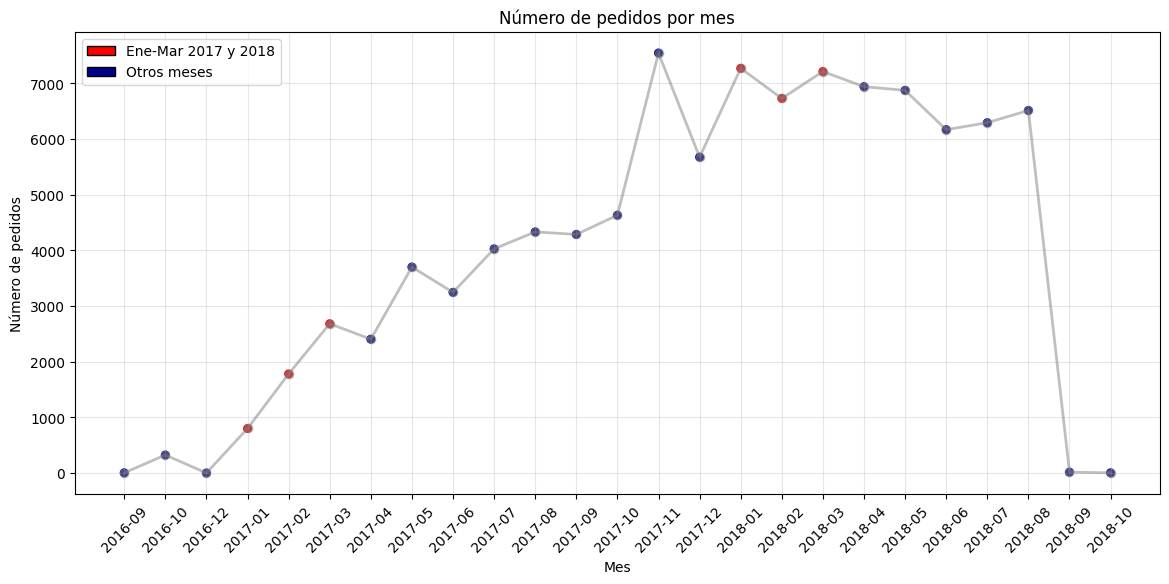

In [34]:
from matplotlib import legend
# Personalicemos el gráfico de la celda anterior
# Análisis  por mes (Tendencia estacional)
# Agrupar por año y mes
olist_orders["YearMonth"] = olist_orders.order_purchase_timestamp.dt.to_period("M")

# Número de órdenes/pedidos de cada año-mes donde tengo datos
monthly_orders = olist_orders.groupby("YearMonth").size()

# Convertir el index de monthly_orders a un dato de tipo str (para manipulación)
monthly_orders.index = monthly_orders.index.astype(str)

# Extraer año y mes
dates = pd.PeriodIndex(monthly_orders.index, freq="M")

# Construimos una lista de colores: De color rojo si es mes 1, 2, 3 para los años 2017 y 2018
colors = ["red" if (date.year in [2017, 2018]) and (date.month in [1,2,3]) else "darkblue" for date in dates]

# Gráfico
plt.figure(figsize=(14, 6))
plt.plot(monthly_orders.index, monthly_orders.values, marker = "o", linewidth = 2, color = "gray", alpha = 0.5) # Línea base
plt.scatter(monthly_orders.index, monthly_orders.values, c = colors, s = 30) # Nodos

# Para resolver el problema de los xticks (sobreescriben)
plt.xticks(rotation = 45)


# Visualización
plt.title("Número de pedidos por mes")
plt.xlabel("Mes")
plt.ylabel("Número de pedidos")
plt.grid(True, alpha = 0.3)

# Construimos una leyenda manual
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor="red", edgecolor="black", label="Ene-Mar 2017 y 2018"),
    Patch(facecolor="darkblue", edgecolor="black", label="Otros meses"),
]
plt.legend(handles=legend_elements, loc="upper left")

# Fin
plt.tight_layout
plt.show()

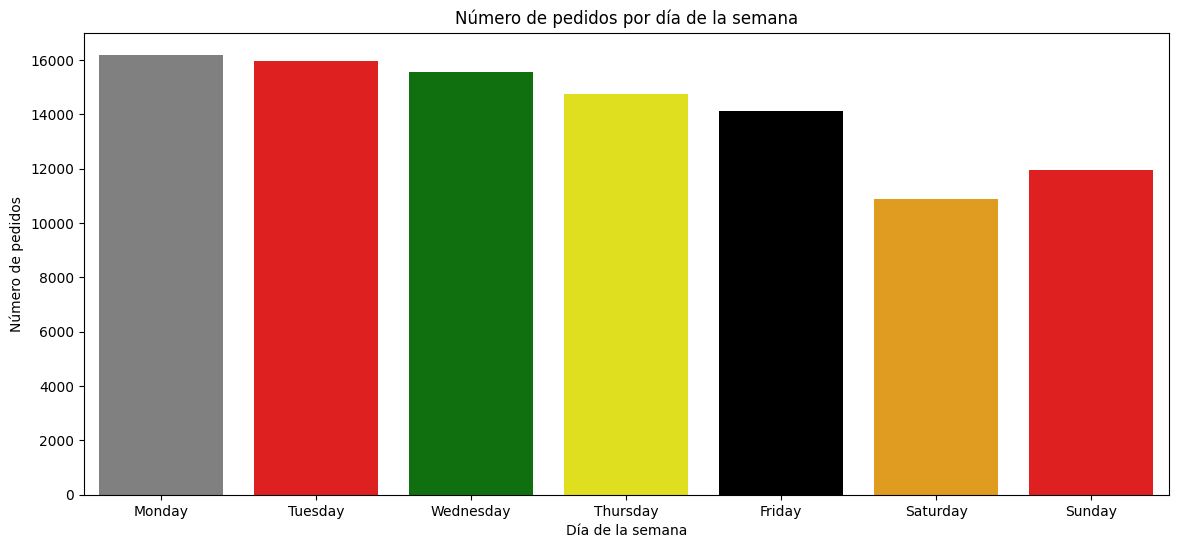

In [49]:
# Análisis por día de la semana
# Ordenar los días de lunes a domingo
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(14, 6))
sns.countplot(x="DayName",
              data=olist_orders,
              order=day_order,
              hue = "DayName",
              #palette = "viridis",
              palette = {"Sunday":"red", "Monday":"gray","Tuesday":"red", "Wednesday":"green", "Thursday":"yellow", "Friday":"black", "Saturday":"orange"}
              )
plt.title("Número de pedidos por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Número de pedidos")

# Fin
plt.tight_layout
plt.show()

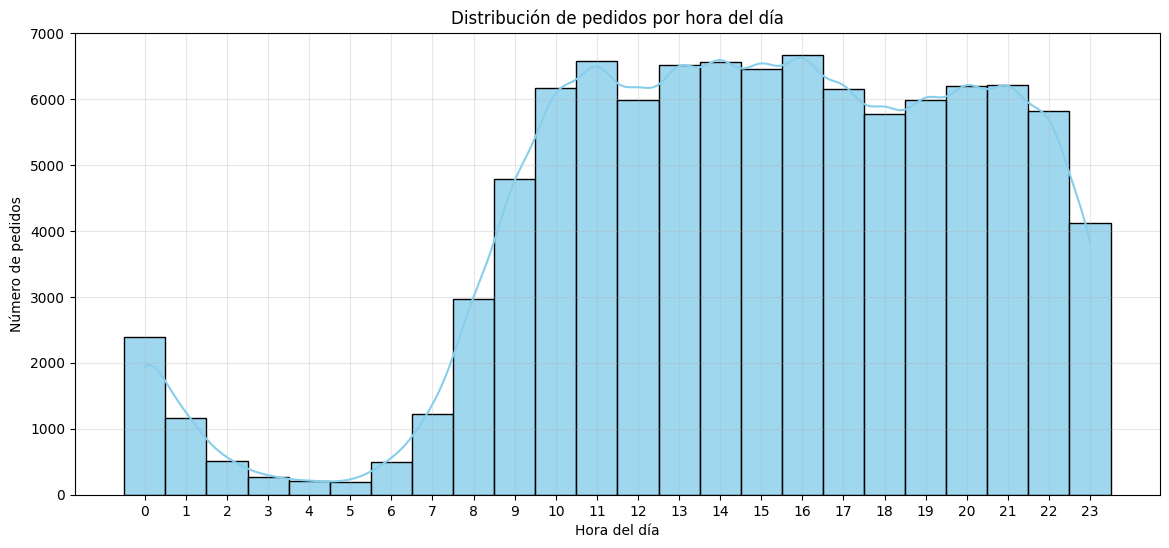

In [50]:
# Análisis por hora del día
plt.figure(figsize=(14, 6))
sns.histplot(olist_orders.Hour, bins=24, kde = True, color = "skyblue", discrete=True, alpha = 0.8)
plt.xticks(range(0, 24))
plt.grid(True, alpha = 0.3)
plt.title("Distribución de pedidos por hora del día")
plt.xlabel("Hora del día")
plt.ylabel("Número de pedidos")

# Fin
plt.tight_layout
plt.show()

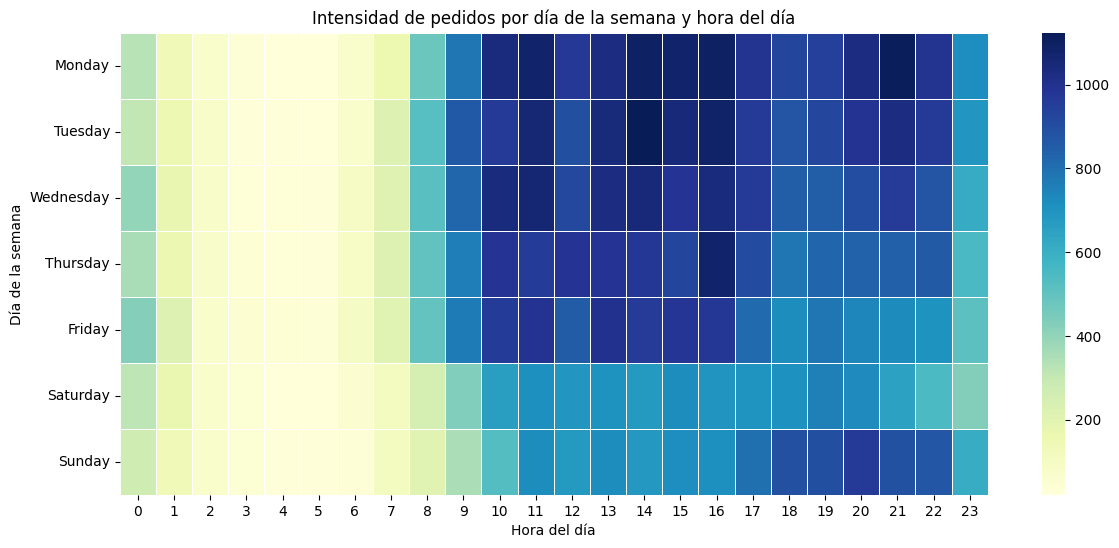

In [51]:
# Heatmap día vs hora

# Tabla de frecuencia cruzada
heatmap_data = olist_orders.groupby(["DayName", "Hour"]).size().unstack(fill_value=0)

# Reordenemos este heatmal_data como nuestro diagrama de barras por día de la semana
heatmap_data = heatmap_data.loc[day_order]

# Gráfico de calor
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidth = 0.5, annot=False)
plt.title("Intensidad de pedidos por día de la semana y hora del día")
plt.xlabel("Hora del día")
plt.ylabel("Día de la semana")

# Fin
plt.tight_layout
plt.show()

**Aplicaciones prácticas**
- Marketing: Programar campañas los jueves para impactar el fin de semana
- Logística: Aumentar capacidad de entrega antes de eventos pico
- Ciencia de datos: Predecir demanda con modelos de serie de tiempo (Modelos ded naturaleza regresional, Modelos de naturaleza Bayesiana, Modelos propios de aprendizaje supervizado (XGBoost), Redes neuronales profundas (RNN))
- Dashboard: Crear de un panel de control (Dash/Streamlit)

# Construcción de información a partir del cruce de dos o más dataframes (Tablas de la base de datos)

![](https://i.imgur.com/HRhd2Y0.png)

In [52]:
# olist_orders.shape = (99441, 16)
olist_order_customer.shape

(99441, 5)

In [53]:
# Fusionemos los siguientes datasets:
  # olist_orders
  # olist_order_customer

# Fusionar por "customer_id"
df = olist_orders.merge(olist_order_customer, on="customer_id", how="inner")

print("Dimensión: ", df.shape)
print("Nombres de las columnas: ", df.columns)

Dimensión:  (99441, 20)
Nombres de las columnas:  Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'Year', 'Mont', 'MontName', 'DayOfWeek', 'DayName', 'Hour', 'Date',
       'YearMonth', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')


In [61]:
# Perfil geográfico de los clientes
# Objetivo: Entender de donde vienen los pedidos

# Top 10 estados más pedidos
top_state = df["customer_state"].value_counts().head(10)
top_state

,count
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


In [62]:
# Top 10 de ciudades
top_city = df["customer_city"].value_counts().head(10)
top_city

,count
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
campinas,1444
porto alegre,1379
salvador,1245
guarulhos,1189


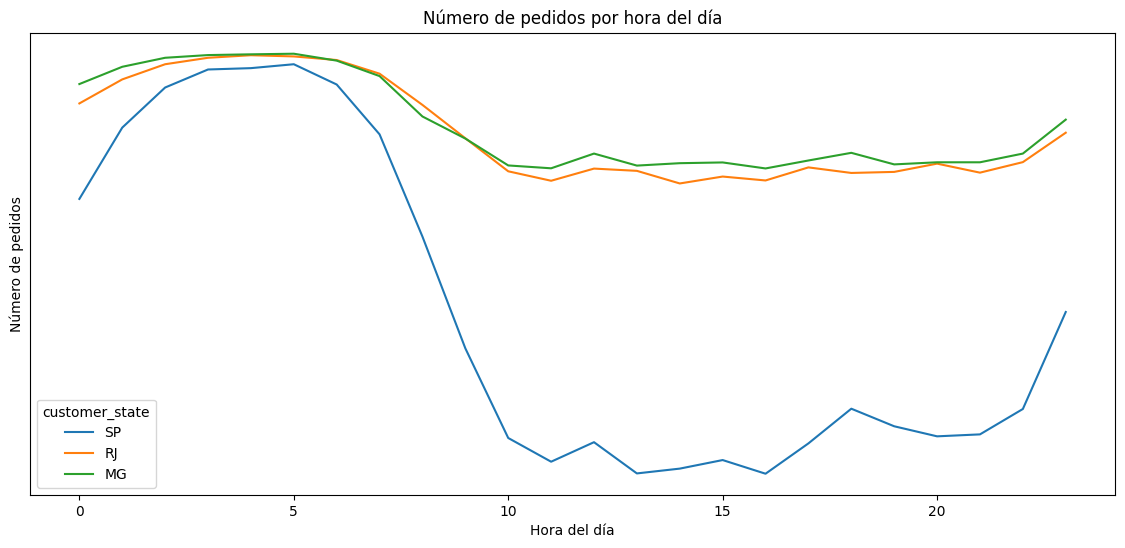

In [67]:
# Consideremos a los 3 primeros estados, y veamos el comportamiento temporal en estos estados de Brasil
top3_states = list(top_state.index[:3])

# Filtremos la información cruzada a estos 3 estados
df_top3 = df[df.customer_state.isin(top3_states)]

# Gráfico
plt.figure(figsize=(14, 6))
sns.lineplot(data = df_top3,
             x = "Hour",
             y = "order_id",
             hue = "customer_state",
             estimator = "count",
             errorbar = None)

# Eliminemos los yticks
plt.yticks([])
plt.title("Número de pedidos por hora del día")
plt.xlabel("Hora del día")
plt.ylabel("Número de pedidos")

# Fin
plt.tight_layout
plt.show()